In [1]:
# GraphUQ Demo - Bipartite Graph-based Uncertainty Quantification
# This notebook demonstrates the GraphUQScorer for claim-level uncertainty quantification

from uqlm.longform.black_box.graphuq import GraphUQScorer
from langchain_google_vertexai import ChatVertexAI
import logging

# Configure logging to see debug output
logging.basicConfig(level=logging.DEBUG, format="%(name)s - %(levelname)s - %(message)s")
logging.getLogger("uqlm.longform.black_box.graphuq").setLevel(logging.DEBUG)

# Initialize the LLM and GraphUQScorer
judge_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0)
nli_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0, logprobs=True)

graphuq_scorer = GraphUQScorer(judge_llm=judge_llm, nli_llm=nli_llm, max_calls_per_min=250)

google.auth._default - DEBUG - Checking None for explicit credentials as part of auth process...
google.auth._default - DEBUG - Checking Cloud SDK credentials as part of auth process...
uqlm.longform.black_box.graphuq - INFO - Initialized GraphUQScorer


In [2]:
# Initialize the LLM and GraphUQScorer
judge_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0)
nli_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0, logprobs=True)

graphuq_scorer = GraphUQScorer(judge_llm=judge_llm, nli_llm=nli_llm, max_calls_per_min=250)

uqlm.longform.black_box.graphuq - INFO - Initialized GraphUQScorer


Testing 10 queries (2 unique queries repeated 5 times each)

In [3]:
responses = [
    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],
    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],
]

original_claim_set = [
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
]

sampled_claim_sets = [
    [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
]

entailment_score_sets = [{"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]}]

In [4]:
# Run GraphUQ evaluation with pre-computed entailment scores

res = await graphuq_scorer.a_evaluate(
    responses,
    original_claim_set,
    sampled_claim_sets,
    entailment_score_sets,
    claim_dedup_method="exact_match",
    use_entailment_prob=False,  # Use entailment probabilities as edge weights; requires nli model to return probs
    show_graph=False,
    # save_graph_path="graphuq_probability.html"
)
print("RESULTS\n","-"*20)
for i, claimscores in enumerate(res):
    print(f"Query {i+1}:")
    for claimscore in claimscores:
        print(claimscore.model_dump_json(indent=4))

uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation for 10 response sets.
uqlm.longform.black_box.graphuq - DEBUG - Step 1: Deduplicating claims for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Master claim set size after dedup: 4
uqlm.longform.black_box.graphuq - DEBUG - [Response set 1] Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - [Response set 1] Master claim set size after dedup: 3
uqlm.longform.black_box.graphuq - DEBUG - [Response set 2] Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - [Response set 2] Master claim set size after dedup: 4
uqlm.longform.black_box.graphuq - DEBUG - [Response set 3] Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - [Response set 3] Master claim set size after dedup: 3
uqlm.longform.black_box.graphuq - DEBUG - [Response set 4] Initial m

RESULTS
 --------------------
Query 1:
{
    "claim": "The grass is red.",
    "original_response": false,
    "scores": {
        "raw_degree": 1.0,
        "degree_centrality": 0.25,
        "betweenness_centrality": 0.0,
        "closeness_centrality": 0.9523809523809523,
        "page_rank": 0.09628423941572643
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The grass is green.",
    "original_response": true,
    "scores": {
        "raw_degree": 3.0,
        "degree_centrality": 0.75,
        "betweenness_centrality": 0.08333333333333333,
        "closeness_centrality": 1.1428571428571428,
        "page_rank": 0.15371576058427355
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The sky is blue.",
    "original_response": true,
    "scores": {
        "raw_degree": 3.0,
        "degree_centrality": 0.75,
        "betweenness_centrality": 0.08333333333333333,
        "closeness_centrality": 1.1428571428571428,
        "page_rank": 0.15371576058427355
    },
    "scorer_t

In [8]:
res

[[ClaimScore(claim='The sky is blue.', original_response=True, scores={'raw_degree': 3.0, 'degree_centrality': 0.75, 'betweenness_centrality': 0.7777777777777778, 'closeness_centrality': 0.7142857142857143, 'page_rank': 0.20136585453904104}, scorer_type='graphuq'),
  ClaimScore(claim='The grass is green.', original_response=True, scores={'raw_degree': 1.0, 'degree_centrality': 0.25, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.4166666666666667, 'page_rank': 0.07979128569876377}, scorer_type='graphuq'),
  ClaimScore(claim='The grass is red.', original_response=False, scores={'raw_degree': 2.0, 'degree_centrality': 0.5, 'betweenness_centrality': 0.5555555555555556, 'closeness_centrality': 0.625, 'page_rank': 0.13799211439484577}, scorer_type='graphuq'),
  ClaimScore(claim='The ocean is pink.', original_response=False, scores={'raw_degree': 1.0, 'degree_centrality': 0.25, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.38461538461538464, 'page_rank': 0.080850745367349

***

Testing a factscore entry

In [1]:
# GraphUQ Demo - Bipartite Graph-based Uncertainty Quantification
# This notebook demonstrates the GraphUQScorer for claim-level uncertainty quantification

from uqlm.longform.black_box.graphuq import GraphUQScorer
from langchain_google_vertexai import ChatVertexAI
import logging
from uqlm.scorers.longform import LongFormUQ
from uqlm.utils.dataloader import load_example_dataset

# Configure logging to see debug output from uqlm only
logging.basicConfig(level=logging.INFO, format="%(name)s - %(levelname)s - %(message)s")
logging.getLogger("uqlm.longform.black_box.graphuq").setLevel(logging.DEBUG)

# Initialize the LLM and GraphUQScorer
llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0.7)
judge_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0)
nli_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0, logprobs=True)

# get data
df = load_example_dataset("factscore")

# initalize uqlm scorer
lfuq = LongFormUQ(llm=llm, 
                  mode="graphuq", 
                  granularity="claim", 
                  aggregation_method="mean", 
                  sampling_temperature=1, 
                  nli_llm=nli_llm, 
                  claim_decomposition_llm=judge_llm)

Loading dataset - factscore...


uqlm.longform.black_box.graphuq - INFO - Initialized GraphUQScorer


Processing dataset...
Dataset ready!


Output()

I0000 00:00:1761785414.776781 1273893 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation for 1 response sets.
uqlm.longform.black_box.graphuq - DEBUG - Step 1: Deduplicating claims for all response sets...


uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 79
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 0] Found 76 unique claims


uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 0] Adding 27 new claims
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 79
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 1] Found 78 unique claims


uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 1] Adding 9 new claims
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Master claim set size after dedup: 115
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Original claims missing: 0
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Entirely new claims added: 0
uqlm.longform.black_box.graphuq - DEBUG - Step 2: Computing adjacency matrices for all response sets...


uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Computing entailment scores for master claim set...
uqlm.longform.black_box.graphuq - DEBUG - Executing 345 NLI predictions concurrently...


I0000 00:00:1761785519.537661 1273893 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: oauth2.googleapis.com. Connection pool size: 10
urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: 

uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Biadjacency matrix shape: (115, 3)
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Filtered 0 edges below threshold 0.001
uqlm.longform.black_box.graphuq - DEBUG - Step 3: Constructing graphs and calculating scores for all response sets...


uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Constructing bipartite graph...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Bipartite graph constructed: 118 nodes (115 claims, 3 responses), 219 edges
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Calculating claim node graph metrics...
uqlm.longform.black_box.graphuq - DEBUG - Raw degrees (number of connections): {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 1, 14: 2, 15: 3, 16: 2, 17: 3, 18: 3, 19: 2, 20: 1, 21: 1, 22: 1, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 3, 30: 2, 31: 3, 32: 2, 33: 3, 34: 3, 35: 2, 36: 1, 37: 3, 38: 2, 39: 1, 40: 1, 41: 3, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 3, 65: 3, 66: 3, 67: 3, 68: 0, 69: 3, 70: 2, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 2, 86:

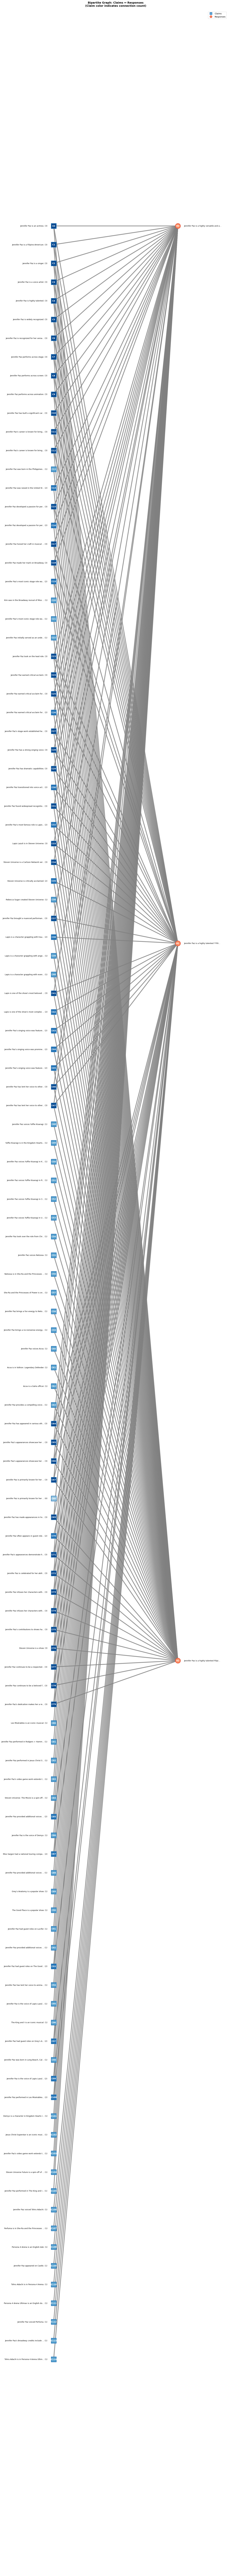

In [2]:
res = await lfuq.generate_and_score([df.tail(n=1)["factscore_prompt"].iloc[0]], num_responses=2, show_graph=True)

In [3]:
res.to_dict()

{'data': {'responses': ['Jennifer Paz is a highly versatile Filipino-American actress, singer, and voice artist known for her compelling performances across various mediums, from Broadway stages to beloved animated series.\n\nBorn in the Philippines, Paz moved to the United States and quickly established herself as a formidable talent in the theater world. She is perhaps most celebrated for her iconic portrayal of **Kim** in the Broadway production of **Miss Saigon**, a role she took on at a young age and for which she earned critical acclaim. Her powerful voice and emotional depth brought the challenging character to life, solidifying her status as a significant stage presence. She also graced the Broadway stage as **Eponine** in **Les Misérables** and has appeared in numerous regional and national touring productions.\n\nIn recent years, Jennifer Paz has gained widespread recognition for her distinctive voice work, particularly as the voice of **Lapis Lazuli** in the critically accla